In [151]:
import cv2 
from PIL import Image
import matplotlib.pyplot as plt 
from bubbleDetection.dataset import * 
from bubbleDetection.transform import *
from bubbleDetection.detector import *
from matplotlib import patches
from bubbleDetection.model import BubLeNet
import torch
import torchvision.transforms as T

from skimage import exposure
from skimage import data, img_as_float
import skimage
from skimage.color import rgb2gray

# load model 
model = BubLeNet(num_classes=4) 
model_static_dict = torch.load("bubble_weight.pth")
model.load_state_dict(model_static_dict)
model.eval()

BubLeNet(
  (cnn_net): Sequential(
    (0): Conv2d(3, 6, kernel_size=(18, 18), stride=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_net): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=4, bias=True)
  )
)

In [165]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    # img_cdf, bins = exposure.cumulative_distribution(image, bins)
    # ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


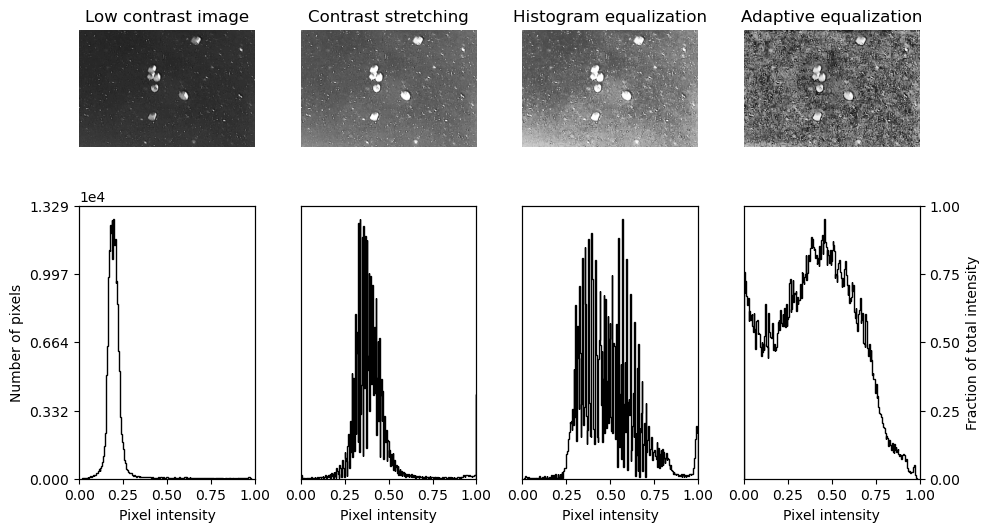

In [166]:
# Load an example image
idx = 24
img = load_image(idx, transform=transform_crop)
# img = bubimg
# input_image = rgb2gray(image_0)
# img = rgb2gray(img)
 
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.3)

# Display results
fig = plt.figure(figsize=(10, 6))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex=axes[0, 0], sharey=axes[0, 0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(rgb2gray(img), axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(rgb2gray(img_rescale), axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(rgb2gray(img_eq), axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(rgb2gray(img_adapteq), axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show() 

c:\Users\shuduo\miniconda3\envs\pytorch\Lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


(-0.5, 599.5, 399.5, -0.5)

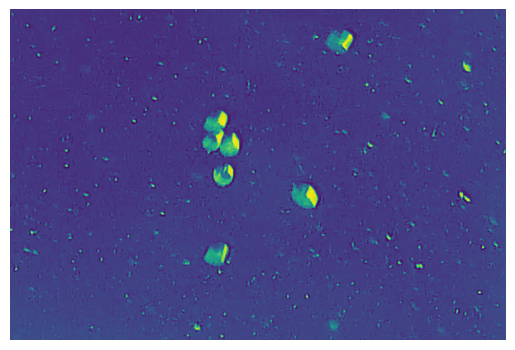

In [153]:
idx = 24
img_raw = load_image(idx, transform=transform_crop)
img_gray = np.dot(img_raw, [0.2989, 0.5870, 0.1140])
img_eq = exposure.equalize_hist(img_raw)
fig, ax = plt.subplots()
ax.imshow(img_gray)
ax.axis('off')
# fig.savefig('tmp.png', bbox_inches='tight', pad_inches=0)

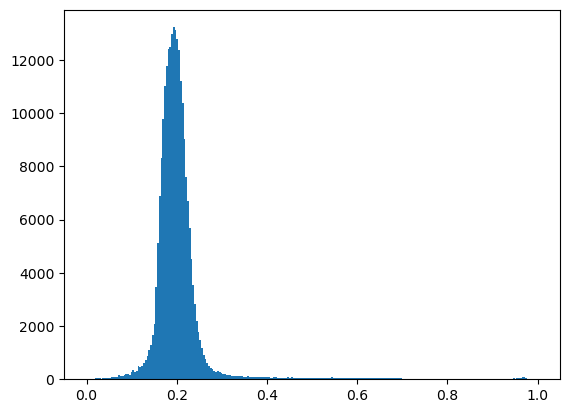

In [107]:
# 绘制直方图  
# input = rgb2gray(img_eq)
input = rgb2gray(img_raw)
plt.hist(input.ravel(), bins=256, range=[0, 1])  
plt.show()  

c:\Users\shuduo\miniconda3\envs\pytorch\Lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


(-0.5, 599.5, 399.5, -0.5)

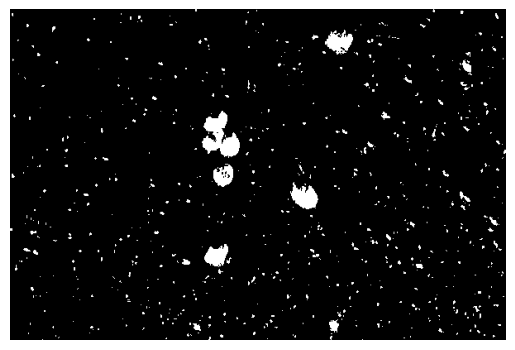

In [157]:
idx = 24
img = load_image(idx, transform=transform_binimg)
# img = rgb2gray(img)
fig, ax = plt.subplots() 
ax.imshow(img, cmap='gray')
ax.axis("off")

In [ ]:
# parameter
padding = 2

idx = 167
for idx in range(1, 246):
    img_raw = load_image(idx, transform=transform_crop)
    height, width, _ = img_raw.shape
    fig, ax = plt.subplots()
    ax.imshow(img_raw)
    img = load_image(idx, transform=transform_binimg)

    # detection 
    cc = binimg_bubble_detector(img, area_threshold=100)

    # image index 
    for c in cc:
    # for c in [cc[0]]: 
        # add bounding box 
        rect = patches.Rectangle(c[:2], c[2], c[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect) 
        ax.axis('off')
        
        # predict 
        bubimg = img_raw[max(0, c[1]-padding): min(height - 1, c[1]+c[3] + padding), \
                max(0, c[0]-padding): min(width - 1, c[0]+c[2] + padding)]
        input = bubble_resize(bubimg) 
        output = model(input.unsqueeze(0))
        _, res = torch.max(output, dim=1)

        # put predict result 
        font_dict = dict(size=12, weight='bold', family='Arial')
        bbox_dict = dict(facecolor='red', alpha=1, edgecolor='red', pad=0)
        plt.text(c[0]+c[2],c[1]+3+font_dict['size'], int(res), fontdict=font_dict, bbox=bbox_dict)  
        # add number 

    fig.savefig(f"results/bubDetRes-{str(idx).zfill(3)}.png", bbox_inches='tight', pad_inches=0)

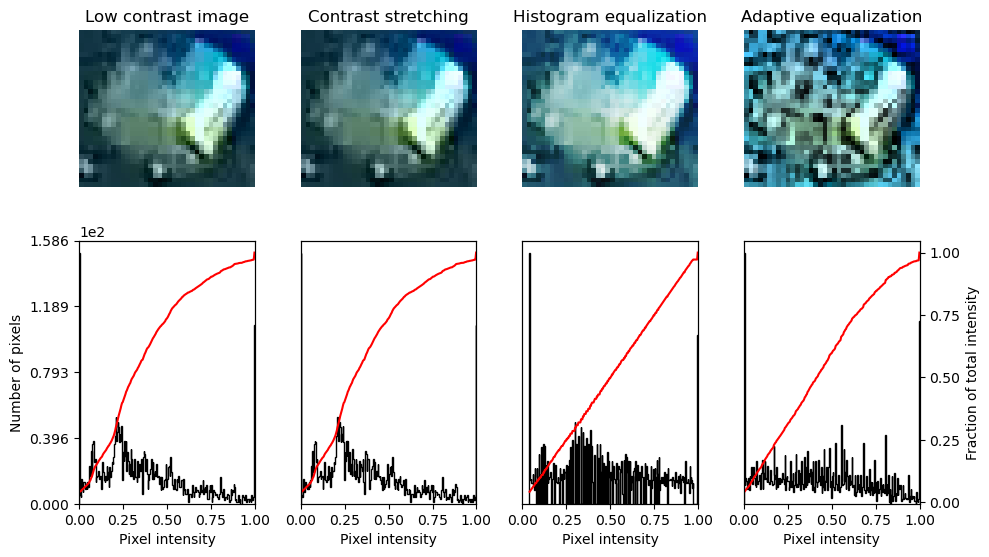

In [89]:
# Load an example image
idx = 24
# img = load_image(idx, transform=transform_crop)
img = bubimg
# input_image = rgb2gray(image_0)
 
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.3)

# Display results
fig = plt.figure(figsize=(10, 6))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex=axes[0, 0], sharey=axes[0, 0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show() 

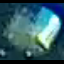

tensor([1])


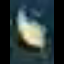

tensor([0])


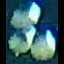

tensor([3])


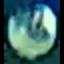

tensor([1])


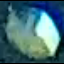

tensor([1])


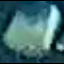

tensor([1])


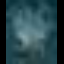

tensor([0])


In [14]:
padding = 2
transform = T.ToPILImage()
for c in cc: 
    bubimg = img_raw[max(0, c[1]-padding): min(height - 1, c[1]+c[3] + padding), \
            max(0, c[0]-padding): min(width - 1, c[0]+c[2] + padding)]
    input = bubble_resize(bubimg) 
    display(transform(input))
    output = model(input.unsqueeze(0))
    _, res = torch.max(output, dim=1)
    print(res)


In [22]:
int(res)

0